In [1]:
import functions as fn
from functions import *

- A bias frame corrects for the readout noise.

- A dark frame corrects for thermal noise.

- A flat frame corrects for vignetting, dust shadows, and variations in pixel sensitivity across the sensor. In the flat frame here we see speckles of of reduced intensity that could be a result of reduced pixel sensitivity or impurities on the sensor. 

- After the noise removal process, we still see cosmic rays, but we have maanged to subtract the electronic noise from the data to recover the signals we are interested in. 

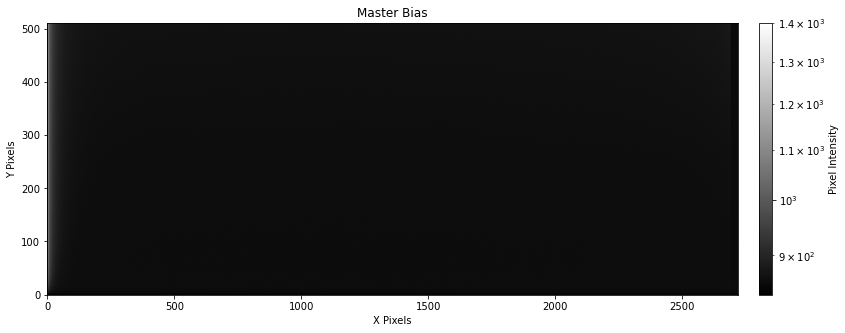

In [2]:
bias_files = []
for i in range(1, 11):
    file_path = f'./data/bias{i:04d}.fits'
    bias_files.append(file_path)
master_bias = fn.create_master_bias(bias_files)
np.save('./data/master_bias.npy', master_bias)

fn.plot_fits(master_bias, 'Master Bias', LogNorm())

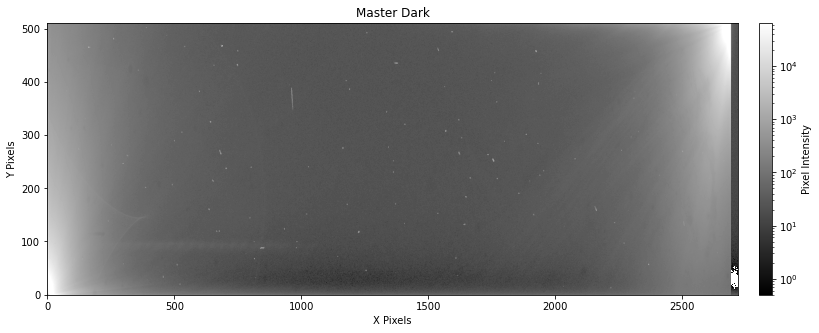

In [3]:
# EXPTIME data = 1800 s
# EXPTIME dark frame 3 = 1800 s (others are way smaller)
dark_files = ['./data/dark0003.fits']
master_dark = fn.create_master_dark(dark_files, master_bias)
np.save('./data/master_dark.npy', master_dark)

# Plot the data
plot_fits(
    master_dark,
    title=f'Master Dark',
    norm=LogNorm(),  # Linear scale
)

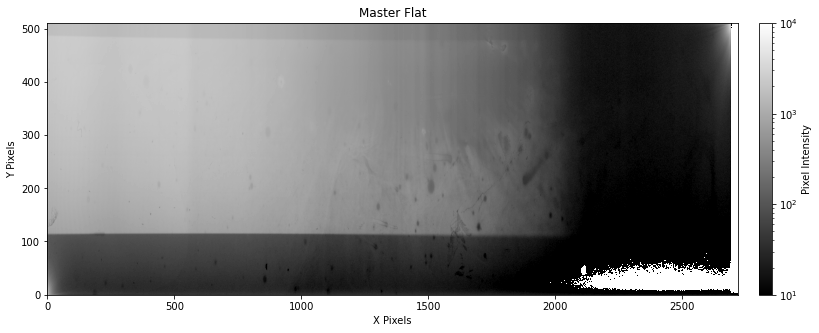

In [4]:
flat_files = []
for i in range(12, 23):
    file_path = f'./data/flat{i:04d}.fits'
    flat_files.append(file_path)
master_flat = fn.create_master_flat(flat_files, master_bias)
np.save('./data/master_flat.npy', master_flat)

fn.plot_fits(master_flat, 'Master Flat', LogNorm(vmin=1e1, vmax=1e4))

In [5]:
data = fn.read_fits('./data/source.fits')
data = data - master_bias
data = data - master_dark
with np.errstate(divide='ignore', invalid='ignore'):
    data = np.true_divide(data, master_flat)
    data[~np.isfinite(data)] = 0  
np.save('./data/data.npy', data)

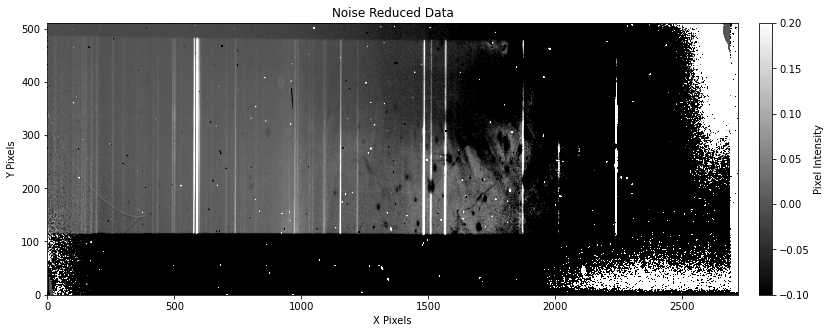

In [8]:
fn.plot_fits(data, 'Noise Reduced Data', Normalize(vmin=-.1, vmax=0.2))